In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

from svd import ApproxSVD

In [2]:
def load_mnist_subset(n_samples=2000):
    mnist = fetch_openml('mnist_784', version=1)
    X = mnist.data.astype(np.float32).to_numpy() / 255.0
    X = X.T[:, :n_samples]  # (784, n_samples)
    
    return X

In [3]:
def show_reconstruction(X_orig, X_recon, num_images=10):
    plt.figure(figsize=(num_images, 2))
    
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X_orig[:, i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Original")

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(X_recon[:, i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title("Reconstructed")

    plt.tight_layout()
    plt.show()

In [4]:
def explained_variance_ratio(X, X_reconstructed):
    error = np.linalg.norm(X - X_reconstructed, 'fro')**2
    total = np.linalg.norm(X, 'fro')**2
    
    return 1 - error / total

In [5]:
def run_approx_svd_experiment(input_data, p=50, g=200):
    X = input_data

    approx_svd = ApproxSVD(g, p, True)
    traces, U, X_approx = approx_svd.fit(X)

    X_reduced = U.T[:p, :] @ X              # (p x d) @ (d x n) = (p x n)
    X_reconstructed = U[:, :p] @ X_reduced  # (d x p) @ (p x n) = (d x n)

    error = np.linalg.norm(X - X_reconstructed, 'fro') ** 2
    total = np.linalg.norm(X, 'fro') ** 2
    explained_variance_ratio = 1 - (error / total)
    print(f"Explained Variance: {explained_variance_ratio * 100:.2f}%")

    show_reconstruction(X, X_reconstructed)

In [6]:
mnist_np = load_mnist_subset(n_samples=2000)

DEBUG - Time: 18.052 seconds for initial scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.060 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.140 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.141 seconds for update scores
DEBUG - Time: 0.000 seconds for find max score
DEBUG - Time: 0.003 seconds for perform matrix mul
DEBUG - Time: 0.139 seconds for update scores
DEBUG - Time: 0.000 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.054 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.147 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform m

Explained Variance: 9.34%


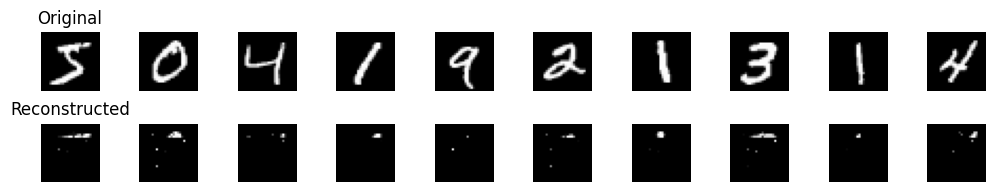

In [7]:
run_approx_svd_experiment(mnist_np, p=200, g=20)

DEBUG - Time: 18.286 seconds for initial scores
DEBUG - Time: 0.000 seconds for find max score
DEBUG - Time: 0.004 seconds for perform matrix mul
DEBUG - Time: 0.190 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.161 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.132 seconds for update scores
DEBUG - Time: 0.000 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.157 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.059 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.149 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform m

Explained Variance: 12.63%


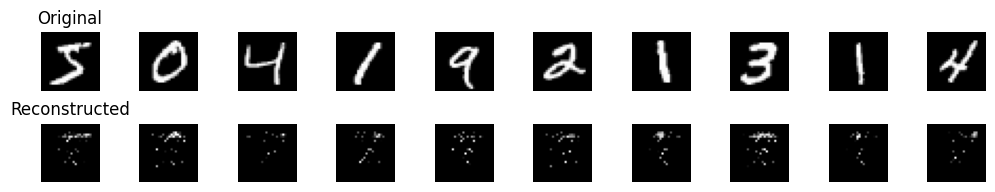

In [8]:
run_approx_svd_experiment(mnist_np, p=200, g=200)

DEBUG - Time: 18.174 seconds for initial scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.002 seconds for perform matrix mul
DEBUG - Time: 0.055 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.140 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.136 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.135 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.000 seconds for perform matrix mul
DEBUG - Time: 0.052 seconds for update scores
DEBUG - Time: 0.000 seconds for find max score
DEBUG - Time: 0.001 seconds for perform matrix mul
DEBUG - Time: 0.134 seconds for update scores
DEBUG - Time: 0.001 seconds for find max score
DEBUG - Time: 0.001 seconds for perform m

Explained Variance: 35.62%


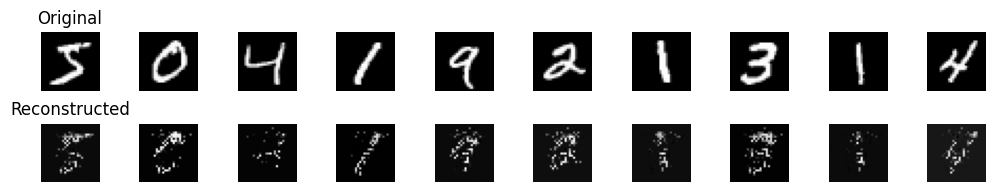

In [9]:
# this does 45% with formula
run_approx_svd_experiment(mnist_np, p=200, g=2000)

Explained Variance: 90.20%


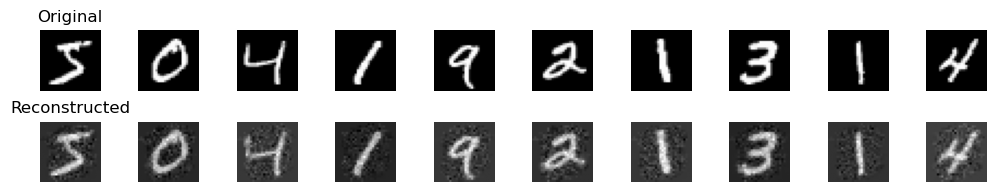

In [17]:
run_approx_svd_experiment(mnist_np, p=200, g=20000)

Explained Variance: 81.80%


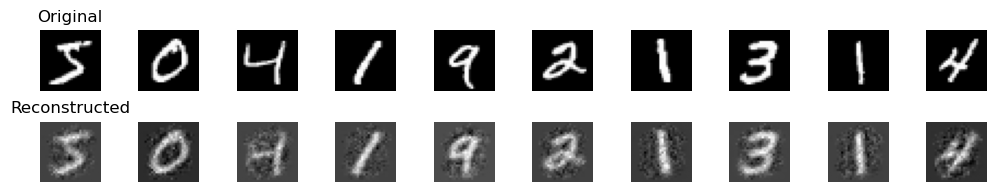

In [19]:
run_approx_svd_experiment(mnist_np, p=50, g=20000)